# Diagram Pipeline 

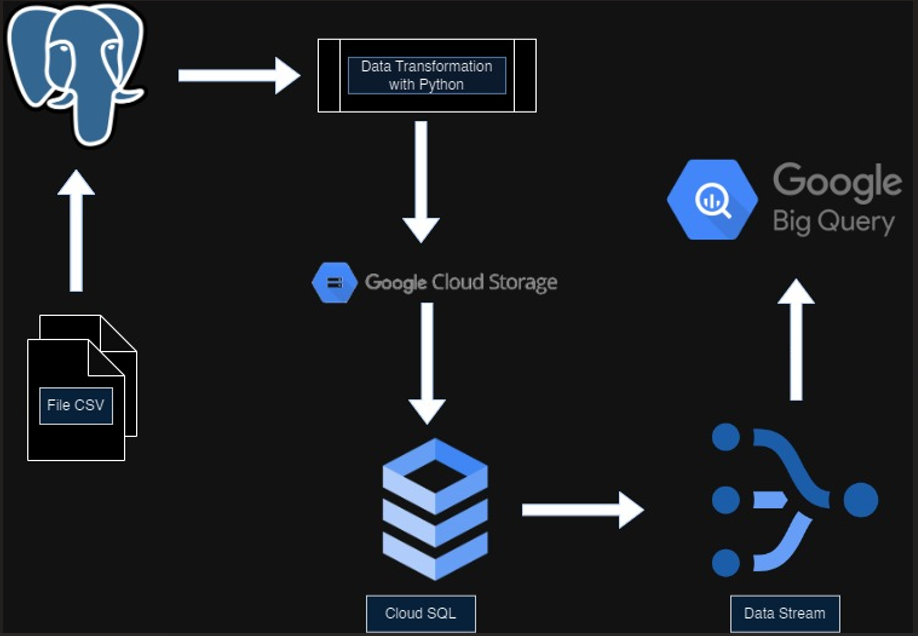

# Data Model ERD

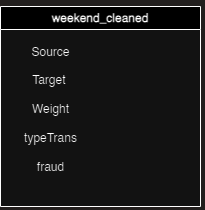

# STEP 1 Install CSV

In [1]:
import pandas as pd 
import numpy as np 

Data_csv = pd.read_csv(r"C:\Users\User\Downloads\SEMUA FOLDER DOWNLOAD\FILE DONWLAODS\ALL PELATIHAN\DATA ENGGINEER IYKRA\Weekly Assignment - Week 5 - Data_Pipeline\dataweekly5.csv")
Data_csv

,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0
...,...,...,...,...,...
594638,'C1753498738','M1823072687',20.53,'es_transportation',0
594639,'C650108285','M1823072687',50.73,'es_transportation',0
594640,'C123623130','M349281107',22.44,'es_fashion',0
594641,'C1499363341','M1823072687',14.46,'es_transportation',0


#  STEP 2 PostgreSQL

# Open Linuk Ubuntu Terminal
# Run source Code 
1.  ### Installing PostgreSQL on the Playground Server

At the command line, the first one will require your password:
- `sudo apt update` 
- `sudo apt install postgresql postgresql-contrib`

### Gain Access to PSQL Command Line
- psql is the interactive terminal for working with PostgreSQL

At the command line:
- `sudo -u postgres psql`

You are not logged in as the "postgres" superuser.

### Create User, Database and Grant Access

#### Create Database
- `CREATE DATABASE cloud_user;`

#### Create User
- `CREATE USER cloud_user WITH ENCRYPTED PASSWORD 'cloud_user';`

#### Grant Access to Database by User
- `GRANT ALL PRIVILEGES ON DATABASE cloud_user TO cloud_user;`

You now have a database you can access named cloud_user as the user cloud_user.

#### Leave PSQL
- `\q`

#### Configure PostgreSQL For Remote Access
- PostgreSQL installs with all access to remote users turned off; this is a good thing, think security

To allow remote access:

- `sudo nano /etc/postgresql/10/main/pg_hba.conf`
    
    Add a last entry to the file:
    - `host    all             all             0.0.0.0/0               md5`
- `CTRL-x` to exit and type `Y` and `Enter\Return` to save

- `sudo nano /etc/postgresql/10/main/postgresql.conf`

    Find the section labeled `CONNECTIONS AND AUTHENTICATION` and above this line 
    
    - `#listen_addresses = 'localhost'` add 
    - `listen_addresses = '*'`
- `CTRL-x` to exit and type `Y` and `Enter\Return` to save 

- `sudo systemctl restart postgresql.service`

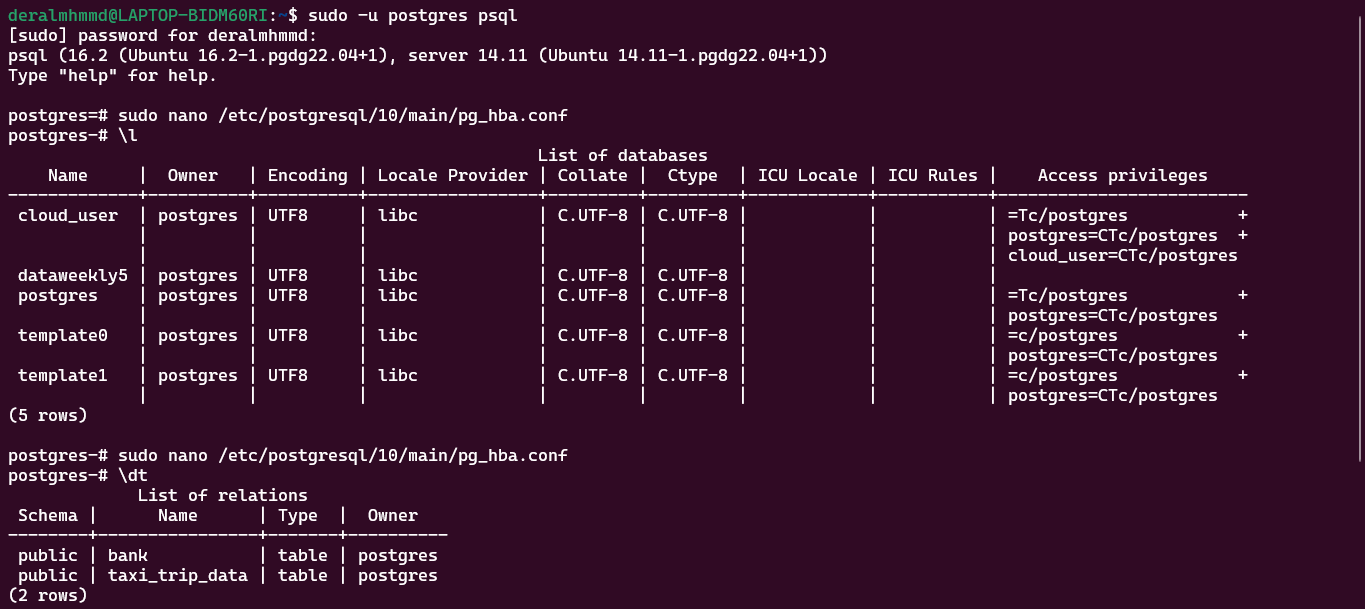

# Open Ubuntu if done Create Database etc

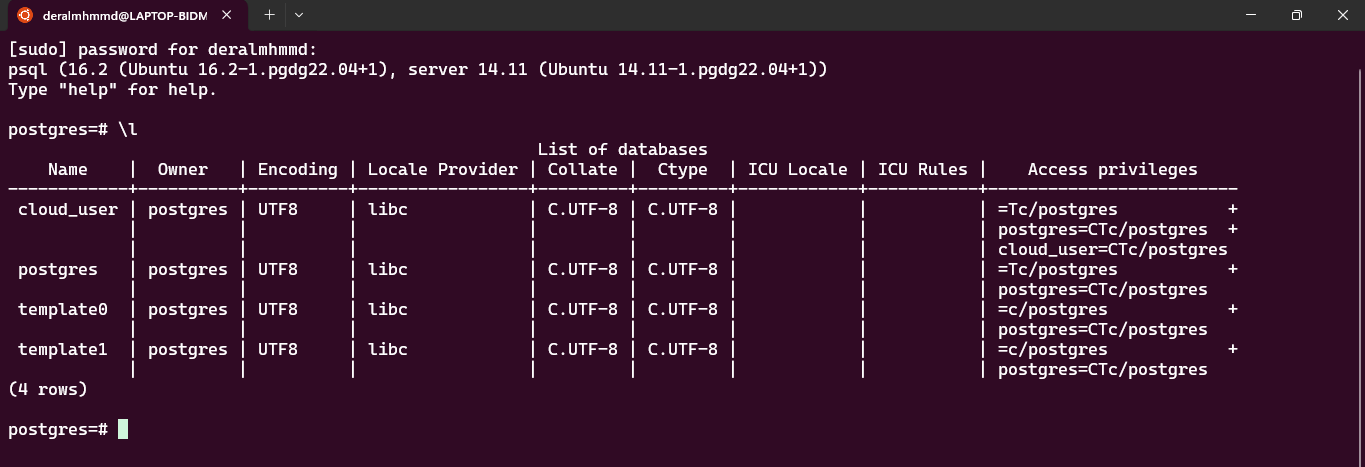

# Open CSV and allow to this source code 

### Server Operations Using Python's Psycopg2

In [43]:
import pandas as pd
import psycopg2

CONNECT_DB = "host=localhost port=5432 dbname=postgres user=postgres password=42191711dD@"

In [45]:
create_table_query = '''CREATE TABLE dataweekly5(
    Source varchar (225),
    Target varchar (225),
    Weight float,
    typeTrans varchar (225),
    fraud int
); '''

try:
    # Make connection to db
    cxn = psycopg2.connect(CONNECT_DB)

    # Create a cursor to db
    cur = cxn.cursor()
    
    # Send sql query to request
    cur.execute(create_table_query)
    cxn.commit()

except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
    
finally:
    #closing database connection.
    if(cxn):
        cur.close()
        cxn.close()
        print("PostgreSQL connection is closed")


Error while connecting to PostgreSQL relation "dataweekly5" already exists

PostgreSQL connection is closed


## Add the data to Table

In [47]:
try:
    # Make connection to db
    cxn = psycopg2.connect(CONNECT_DB)
    
    # Create a cursor to db
    cur = cxn.cursor()
    
    with open('./dataweekly5.csv', 'r') as f:
        # skip first row, header row
        next(f)
        cur.copy_from(f, 'dataweekly5', sep=",")
        cxn.commit()

except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
    
finally:
    #closing database connection.
    if(cxn):
        cur.close()
        cxn.close()
        print("PostgreSQL connection is closed")
        print("dataweekly5 table populated")


PostgreSQL connection is closed
dataweekly5 table populated


### Selecting Data From a Server

Use `.fetchall()` with LIMIT or TOP (#) 
- LIMIT works for most databases, but does not work with SQL Server
- TOP (#) is used in place of LIMIT on SQL Server

In [48]:
def db_server_fetch(sql_query):
    try:
        # Make connection to db
        cxn = psycopg2.connect(CONNECT_DB)

        # Create a cursor to db
        cur = cxn.cursor()

        # Send sql query to request
        cur.execute(sql_query)
        records = cur.fetchall()

    except (Exception, psycopg2.Error) as error :
        print ("Error while connecting to PostgreSQL", error)

    finally:
        #closing database connection.
        if(cxn):
            cur.close()
            cxn.close()
            print("PostgreSQL connection is closed")
        return records

### Test table is populated by Select ing the first five rows 

In [50]:
select_query = '''SELECT * FROM dataweekly5 LIMIT 5;'''

records = db_server_fetch(select_query)
print(records)


PostgreSQL connection is closed
[("'C1093826151'", "'M348934600'", 4.55, "'es_transportation'", 0), ("'C352968107'", "'M348934600'", 39.68, "'es_transportation'", 0), ("'C2054744914'", "'M1823072687'", 26.89, "'es_transportation'", 0), ("'C1760612790'", "'M348934600'", 17.25, "'es_transportation'", 0), ("'C757503768'", "'M348934600'", 35.72, "'es_transportation'", 0)]


In [51]:
records

[("'C1093826151'", "'M348934600'", 4.55, "'es_transportation'", 0),
 ("'C352968107'", "'M348934600'", 39.68, "'es_transportation'", 0),
 ("'C2054744914'", "'M1823072687'", 26.89, "'es_transportation'", 0),
 ("'C1760612790'", "'M348934600'", 17.25, "'es_transportation'", 0),
 ("'C757503768'", "'M348934600'", 35.72, "'es_transportation'", 0)]

In [52]:
def db_server_change(sql_query):
    try:
        # Make connection to db
        cxn = psycopg2.connect(CONNECT_DB)

        # Create a cursor to db
        cur = cxn.cursor()

        # Send sql query to request
        cur.execute(sql_query)
        records = conn.commit()

    except (Exception, psycopg2.Error) as error :
        print ("Error while connecting to PostgreSQL", error)

    finally:
        #closing database connection.
        if(cxn):
            cur.close()
            cxn.close()
            print("PostgreSQL connection is closed")
        return records

### Add a new record with the following data:

On Saturday, new wait staff Alfred had one person at Breakfast for 10.76 and received a 0.50 tip.

In [58]:
select_query = '''SELECT * FROM dataweekly5 LIMIT 10;'''

records = db_server_fetch(select_query)
print(records)


PostgreSQL connection is closed
[("'C1093826151'", "'M348934600'", 4.55, "'es_transportation'", 0), ("'C352968107'", "'M348934600'", 39.68, "'es_transportation'", 0), ("'C2054744914'", "'M1823072687'", 26.89, "'es_transportation'", 0), ("'C1760612790'", "'M348934600'", 17.25, "'es_transportation'", 0), ("'C757503768'", "'M348934600'", 35.72, "'es_transportation'", 0), ("'C1315400589'", "'M348934600'", 25.81, "'es_transportation'", 0), ("'C765155274'", "'M348934600'", 9.1, "'es_transportation'", 0), ("'C202531238'", "'M348934600'", 21.17, "'es_transportation'", 0), ("'C105845174'", "'M348934600'", 32.4, "'es_transportation'", 0), ("'C39858251'", "'M348934600'", 35.4, "'es_transportation'", 0)]


In [61]:
def db_server_change(sql_query):
    records = None
    try:
        # Make connection to the database
        conn = psycopg2.connect(CONNECT_DB)

        # Create a cursor to the database
        cur = conn.cursor()

        # Send SQL query to the database
        cur.execute(sql_query)
        
        # Commit the transaction
        conn.commit()
        
        # Get the number of affected rows
        records = cur.rowcount

    except psycopg2.Error as error:
        print("Error while connecting to PostgreSQL:", error)

    finally:
        # Closing cursor and database connection
        if conn:
            cur.close()
            conn.close()
            print("PostgreSQL connection is closed")

    return records

# Define the SQL query to add data to the database
add_data = '''INSERT INTO dataweekly5
    (source, target, weight, typetrans, fraud)
    VALUES
    ('DD093826151', 'MD48934600', 4.55, 'es_transportation', 0);'''

# Call the function to execute the SQL query
affected_rows = db_server_change(add_data)
print("Affected rows:", affected_rows)

PostgreSQL connection is closed
Affected rows: 1


In [62]:
select_query = '''SELECT * FROM dataweekly5 LIMIT 5;'''

records = db_server_fetch(select_query)
print(records)

PostgreSQL connection is closed
[("'C1093826151'", "'M348934600'", 4.55, "'es_transportation'", 0), ("'C352968107'", "'M348934600'", 39.68, "'es_transportation'", 0), ("'C2054744914'", "'M1823072687'", 26.89, "'es_transportation'", 0), ("'C1760612790'", "'M348934600'", 17.25, "'es_transportation'", 0), ("'C757503768'", "'M348934600'", 35.72, "'es_transportation'", 0)]


# Creating Table in Database
1.  ### Creating Table in Database:
`Using the psycopg2 module to connect to the PostgreSQL database`. 

`Executing SQL command to create a table named weekend with corresponding columns`

2.  ### Reading the CSV file weekend.csv.

`Using the copy_from() method to copy data from the CSV file to the weekend table in the database.`

`Confirming the changes by committing the transaction with commit()`.

3. ### Fetching Some Initial Data from the Table:

`Executing SQL command to fetch the first 5 rows from the weekend table`.

`Utilizing the db_server_fetch() function to execute the SQL command and return its result`.

4. ### Adding New Data to the Table:

`Defining the SQL command to add new data to the weekend table`.

`Using the db_server_change() function to execute the SQL command and return the number of rows affected by the change`.

4. ### db_server_fetch() and db_server_change() Functions:

`The db_server_fetch() function is used to execute SQL commands that return results from the database. It's used to run SELECT queries`.

`The db_server_change() function is used to execute SQL commands that don't return results or return the number of rows affected by the change. It's used to run INSERT, UPDATE, DELETE, etc. queries`.




# STEP 3 Data Transformation With Python


In [63]:
df = pd.DataFrame(records, columns=['Source', 'Target', 'Weight', 'typeTrans', 'fraud'])

# Print the DataFrame
df

select_query = '''SELECT * FROM dataweekly5 WHERE typeTrans='es_transportationDD';'''

records = db_server_fetch(select_query)
print(records)


def pandas_db_server_fetch(sql_query):
    try:
        # Make connection to db
        cxn = psycopg2.connect(CONNECT_DB)

        # Send sql query to request and create dataframe
        df = pd.read_sql(sql_query, cxn)

    except (Exception, psycopg2.Error) as error :
        print ("Error while connecting to PostgreSQL", error)

    finally:
        #closing database connection.
        if(cxn):
            cxn.close()
            print("PostgreSQL connection is closed")
        return df
    
select_query = '''SELECT * FROM dataweekly5 WHERE typeTrans='es_transportation';'''

alfred_df = pandas_db_server_fetch(select_query)
alfred_df.head()

dataweekly5_df = pandas_db_server_fetch('''SELECT * FROM dataweekly5;''')

dataweekly5_df.head()

dataweekly5_df.tail()

dataweekly5_df.info()

dataweekly5_df.describe()

dataweekly5_df.describe()

dataweekly5_df.isnull().sum()

dataweekly5_df.duplicated()

cleaned_df = dataweekly5_df.drop_duplicates()
cleaned_df.duplicated()

cleaned_df.shape
cleaned_df.count

cleaned_df.tail()

cleaned_df = cleaned_df[(cleaned_df['source'] != 'C10938261DD') & (cleaned_df['source'] != 'C10938261')]
cleaned_df = cleaned_df[(cleaned_df['target'] != 'M3489346DD') & (cleaned_df['target'] != 'M3489346')]
cleaned_df = cleaned_df[cleaned_df['weight'] != 4.77]
cleaned_df = cleaned_df[(cleaned_df['typetrans'] != 'es_transportationDD') & (cleaned_df['typetrans'] != 'es_transportation')]
cleaned_df = cleaned_df[cleaned_df['fraud'] != 23]

cleaned_df.tail()

cleaned_df.count()

dataweekly5_df = cleaned_df

dataweekly5_df.to_csv('dataweekly5_cleaned.csv', index=False, header =False)

PostgreSQL connection is closed
[]


C:\Users\User\AppData\Local\Temp\ipykernel_30472\339926286.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, cxn)


PostgreSQL connection is closed
PostgreSQL connection is closed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973217 entries, 0 to 2973216
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   source     object 
 1   target     object 
 2   weight     float64
 3   typetrans  object 
 4   fraud      int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 113.4+ MB


# Hasil Cleaned Data 

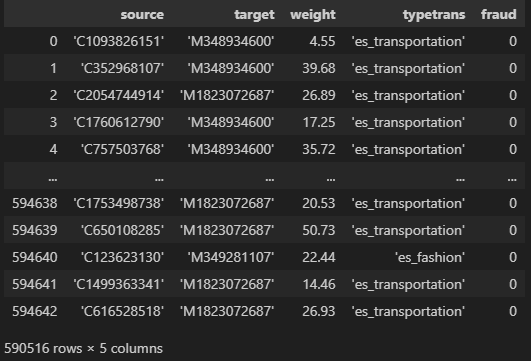

# Creating DataFrame from Database Records

In [64]:
dataweekly5_df.to_csv('dataweekly5_df_cleaned.csv', index=False, header =False)

`This code snippet creates a DataFrame df from the records fetched from the database. It specifies the column names as ['Source', 'Target', 'Weight', 'typeTrans', 'fraud']`.

# Fetching Records with Specific Criteria

In [65]:
select_query = '''SELECT * FROM dataweekly5 WHERE typeTrans='es_transportationDD';'''
records = db_server_fetch(select_query)
print(records)


PostgreSQL connection is closed
[]


`This code snippet executes a SELECT query to fetch records from the weekend table where the value of the typeTrans column is 'es_transportationDD'. It then prints the fetched records.`

# Fetching Records into DataFrame with a Function

In [66]:
def pandas_db_server_fetch(sql_query):
    ...
alfred_df = pandas_db_server_fetch(select_query)


`This code snippet defines a function pandas_db_server_fetch() to fetch records from the database into a DataFrame using Pandas. It then calls this function to fetch records based on a specific SQL query and stores them in a DataFrame named alfred_df`

# Performing Various DataFrame Operations

In [72]:
dataweekly5_df = pandas_db_server_fetch('''SELECT * FROM dataweekly5;''')

dataweekly5_df.tail()

dataweekly5_df.info()

dataweekly5_df.describe()

dataweekly5_df.isnull().sum()

dataweekly5_df.duplicated()


`These code snippets perform various operations on the DataFrame weekend_df such as displaying the first and last few rows, providing information about the DataFrame, generating descriptive statistics, checking for missing values, and checking for duplicate rows`

# Data Cleaning and Filtering

`These code snippets perform data cleaning and filtering operations on the DataFrame cleaned_df. They remove duplicate rows and filter out rows based on specific conditions for columns like 'source', 'target', 'weight', 'typetrans', and 'fraud`

# Exporting DataFrame to CSV File

In [ ]:
dataweekly5_df.to_csv('dataweekly5_cleaned.csv', index=False, header =False)


`This code snippet exports the DataFrame weekend_df to a CSV file named 'weekend_cleaned.csv', without including the index and header information.`

# Create a PostgreSQL instance Google Cloud Storage
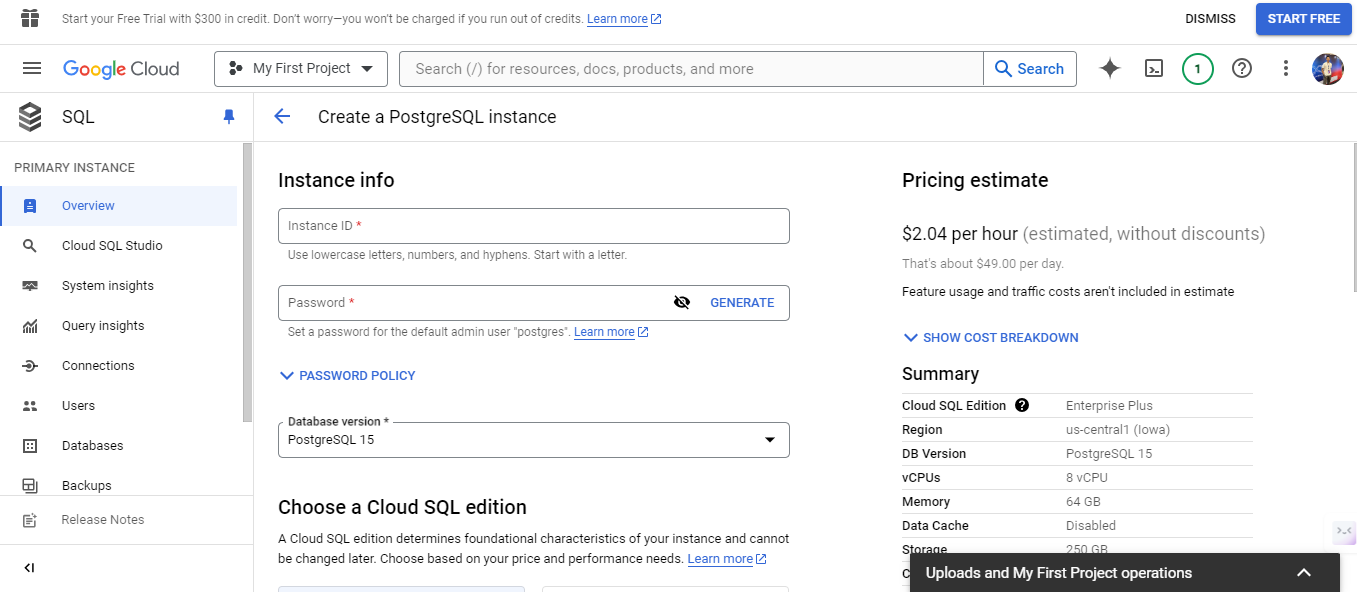

`Write instance into with instance ID + Password`

`Choose Database Version ( PostgreSQL15)`

`Choose region and zonal availability (asia-southeast2 jakarta)`



# Create Database 
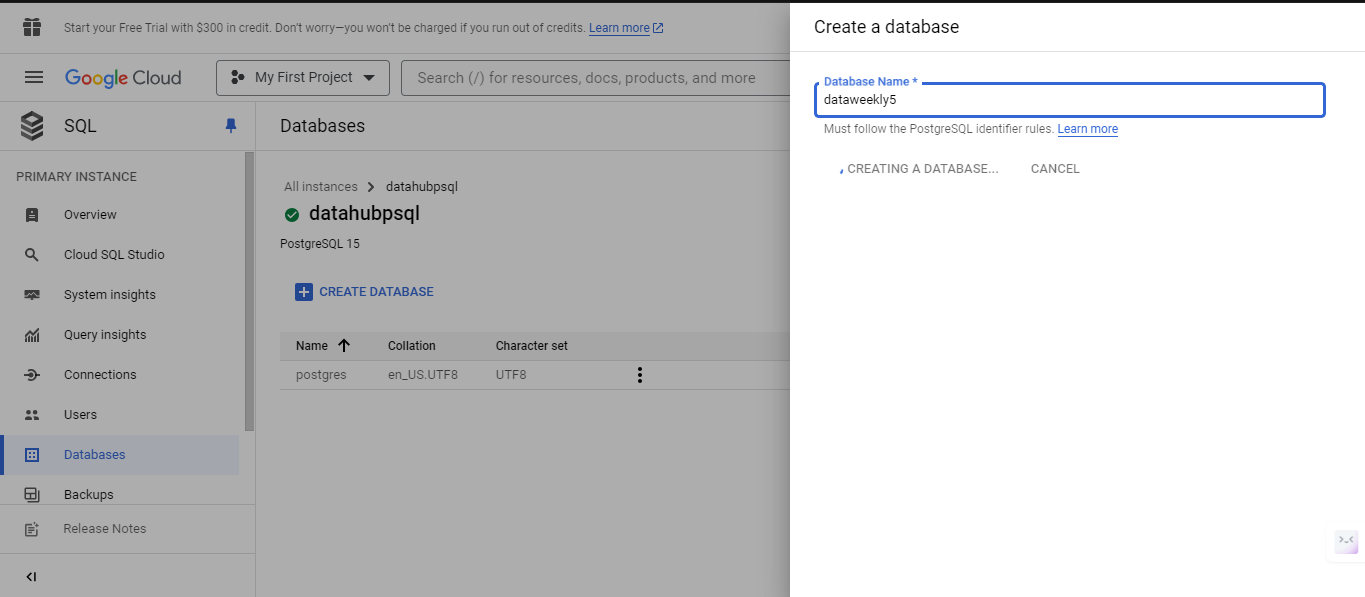

# Import data from Cloud Storage
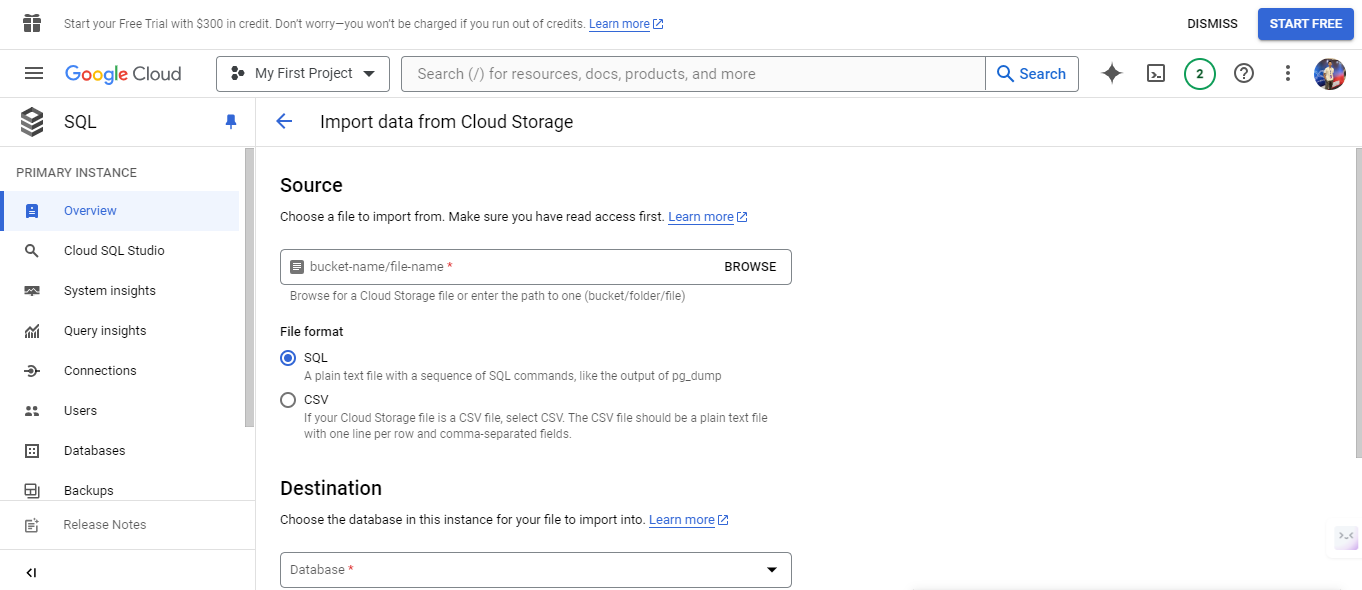

### Create bucket 
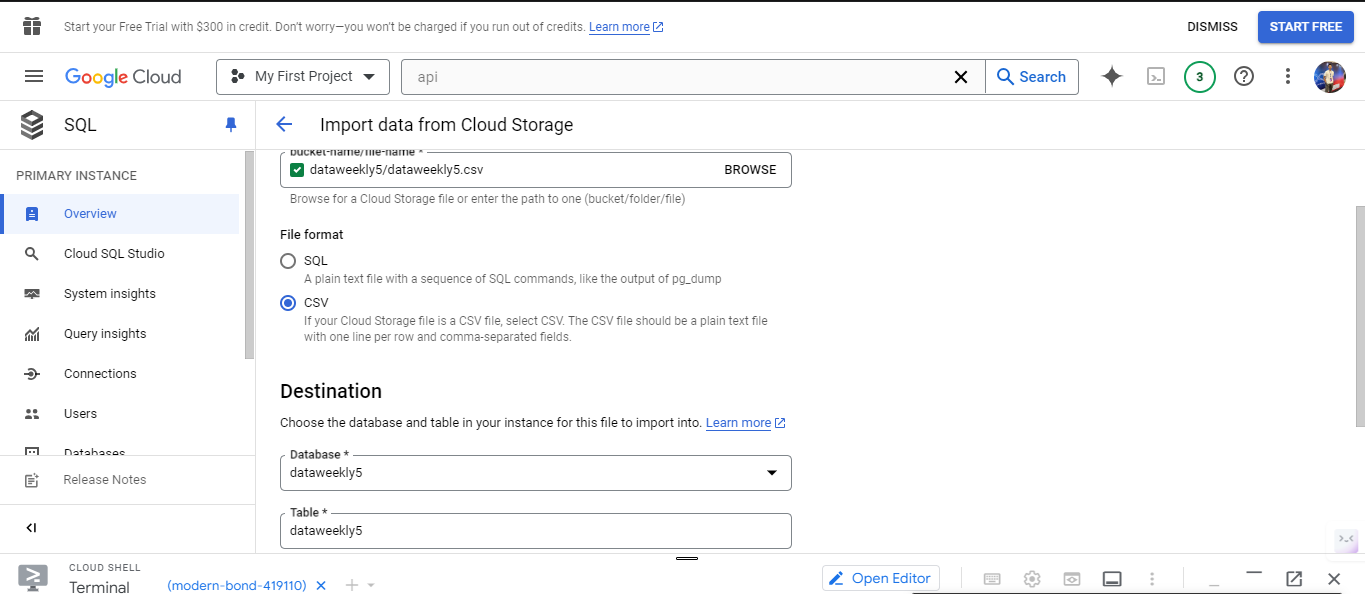

### Create Table and Bucket
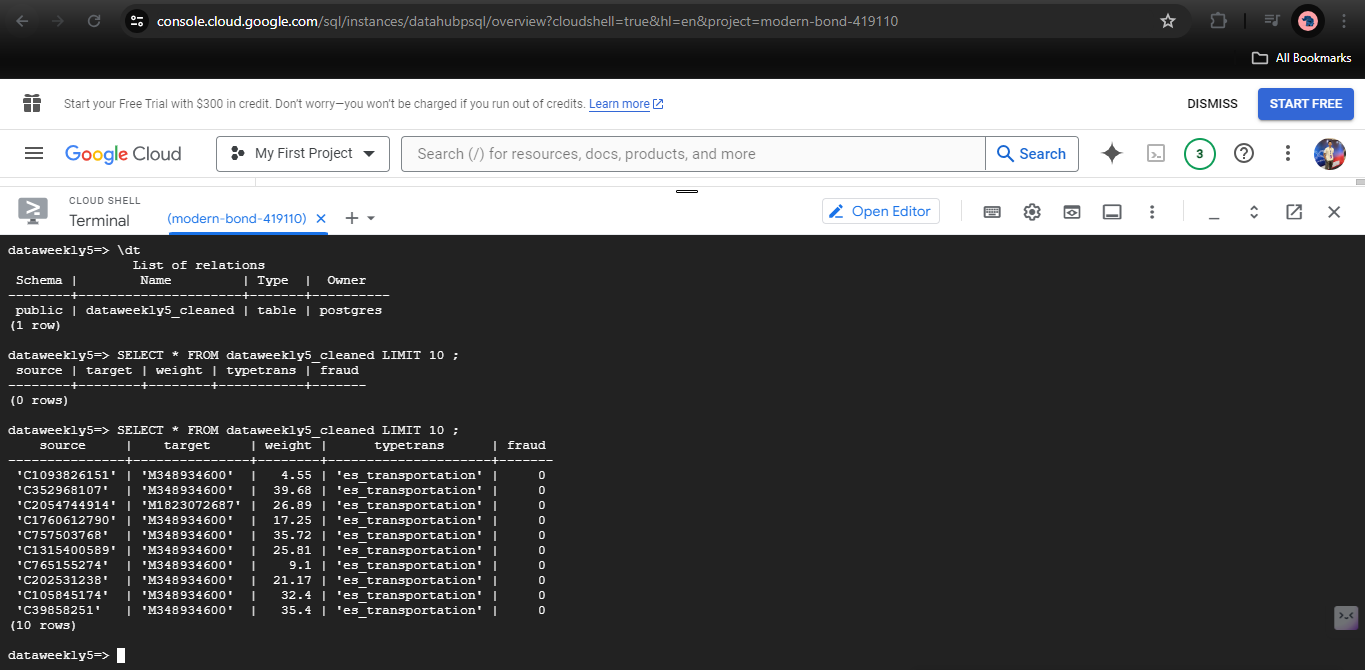

# STEP 4 Cloud SQL 
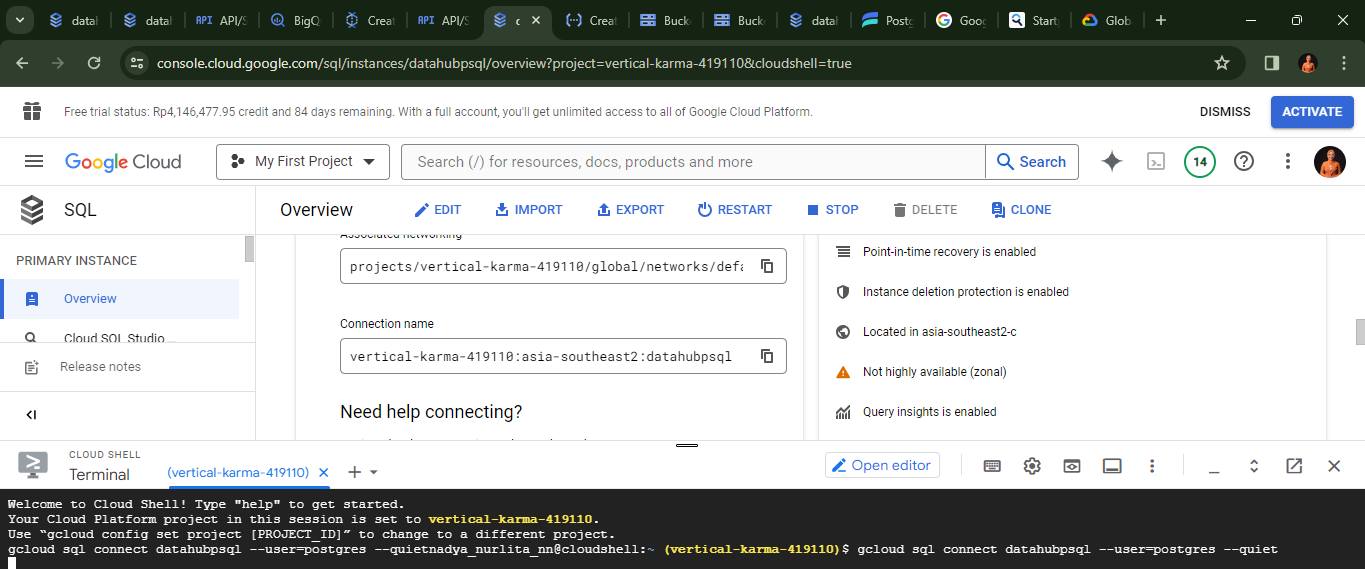


# CREATE TABLE IN GOOGLE OPEN SELL AND IMPORT FILE CSV 

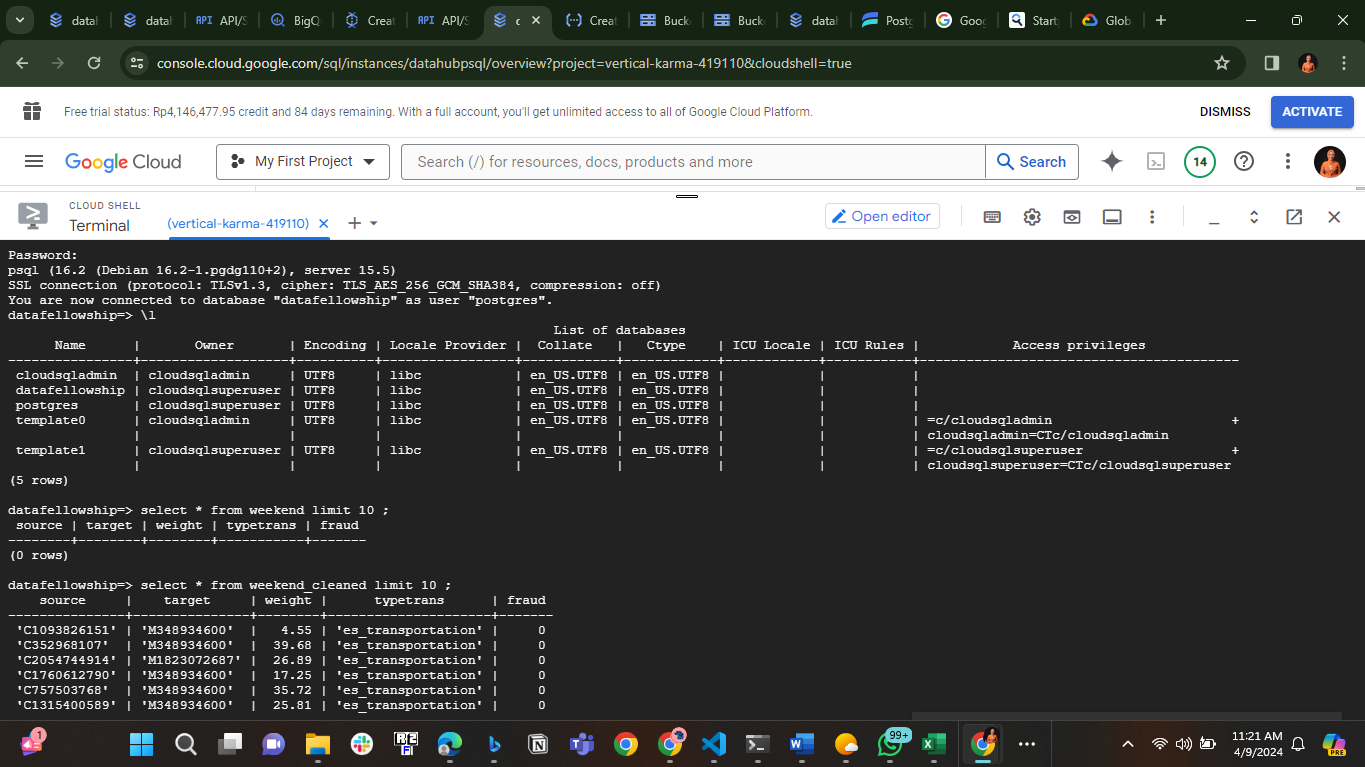

### The sentence you provided can be revised as follows for clarity and grammatical correctness:
### "The STEP is the same, but the source data.csv consists of two datasets: `dataweekly5_cleaned` and `weekend`."
### CREATE TABLE
### This is the SQL command used to create a new table in the database.



weekend_cleaned: This is the name of the new table being created. (Source varchar(225), Target varchar(225), Weight float, typeTrans varchar(225), fraud int): These are the column definitions within the parentheses. Here's what each column represents:

`Source: This column stores the source data.`

`Target: This column stores the target data.`

`Weight: This column stores numerical values representing weight.`

`typeTrans: This column stores transaction types.`

`fraud: This column stores integers representing fraud indicators.`

`varchar(225): This specifies the data type for the Source, Target, and typeTrans columns.`

` varchar stands for variable-length character strings, and (225) indicates the maximum length of the strings that can be stored in these columns.`

`float: This specifies the data type for the Weight column. It stores floating-point numbers, which are decimal numbers.`
`int: This specifies the data type for the fraud column. It stores integer values.`

# IMPORT CSV  IN GOOGLE CLOUD SQL

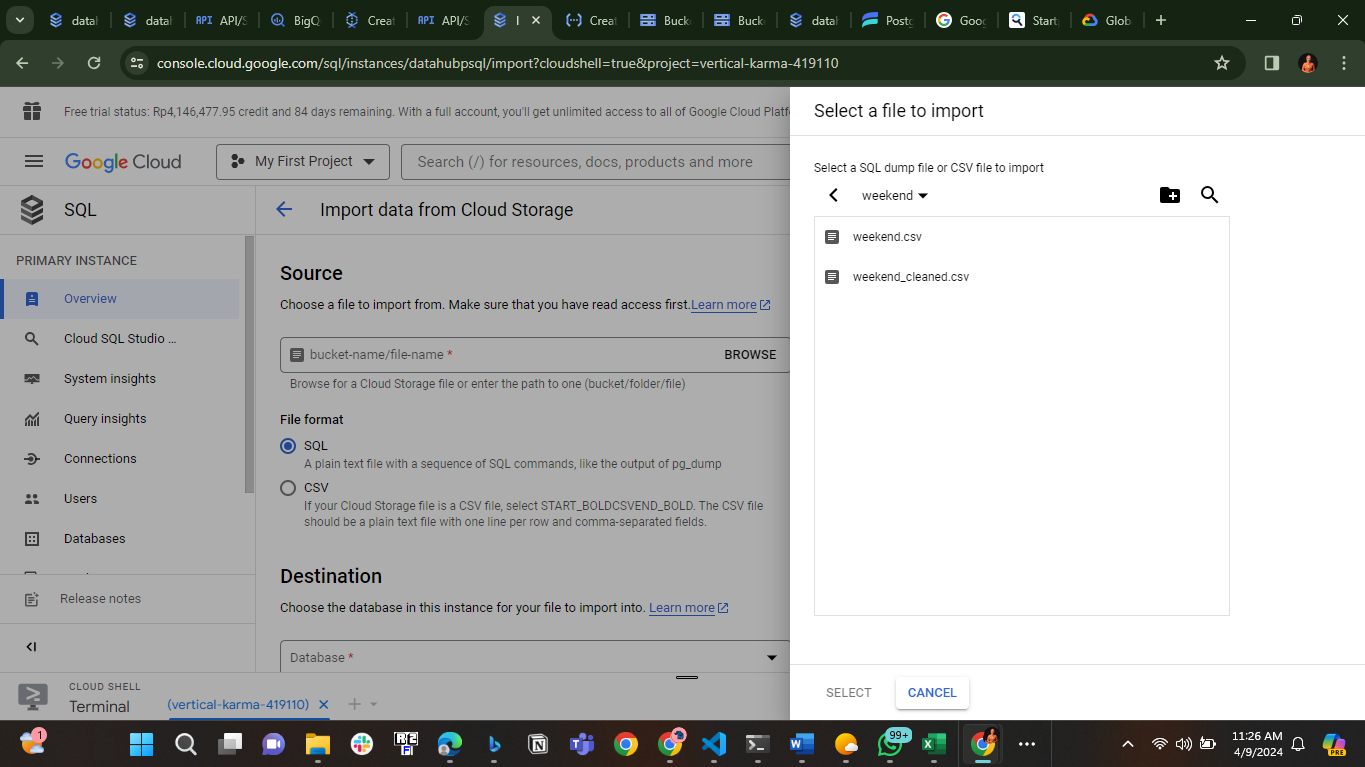

# STEP 5 DATASTEAM TO BIGQUERY 
### Open DataSteam in Google Cloud page Overview 
`klik Create` 
### Allow step by step (data weekend )

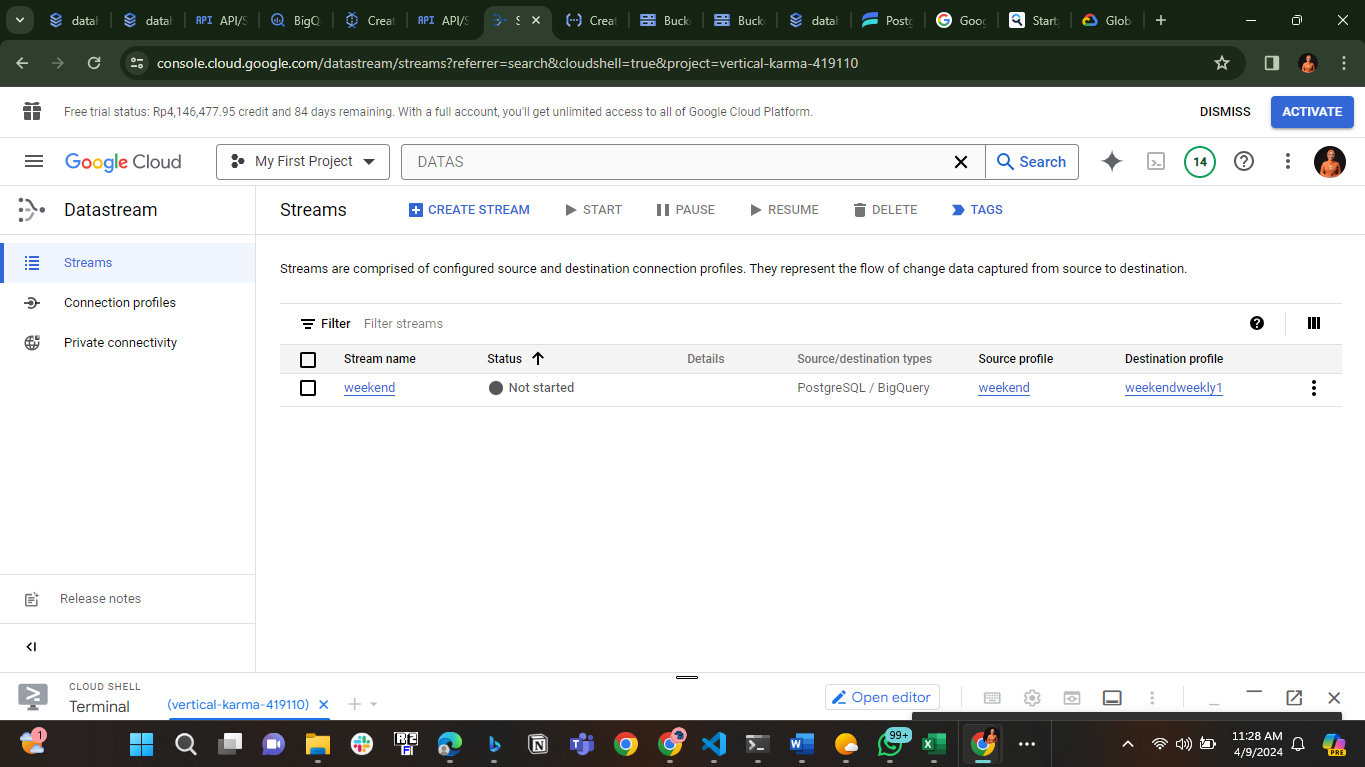 

### Allow step by step (dataweekly5_cleaned)
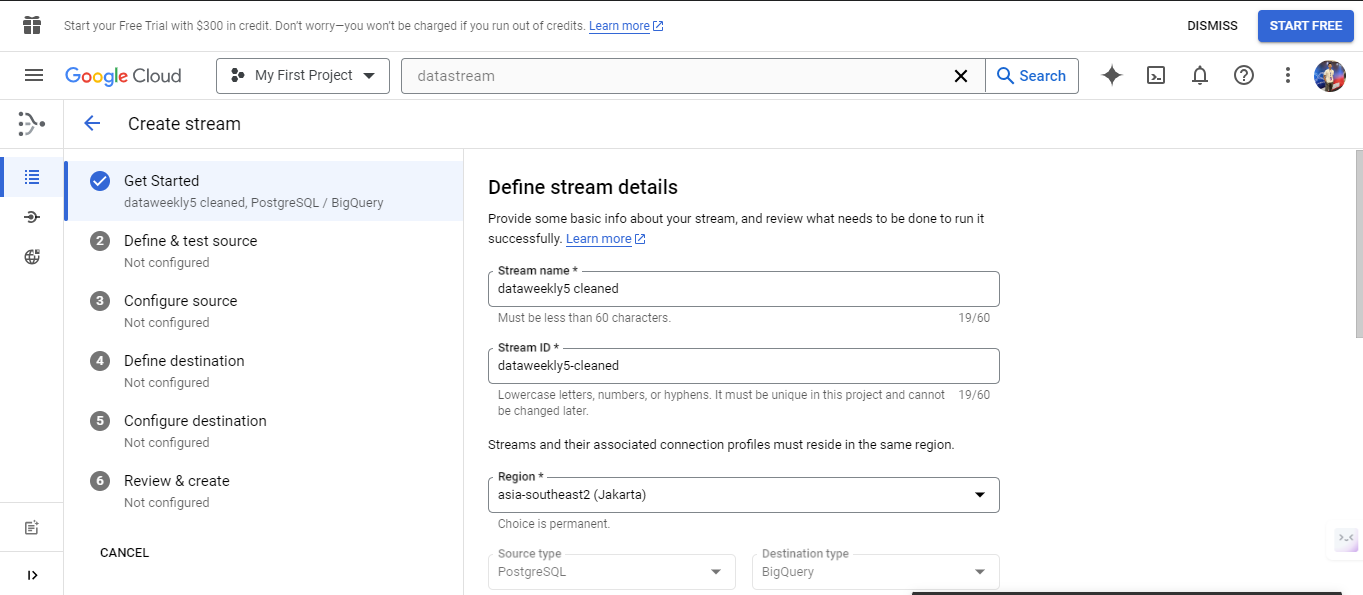


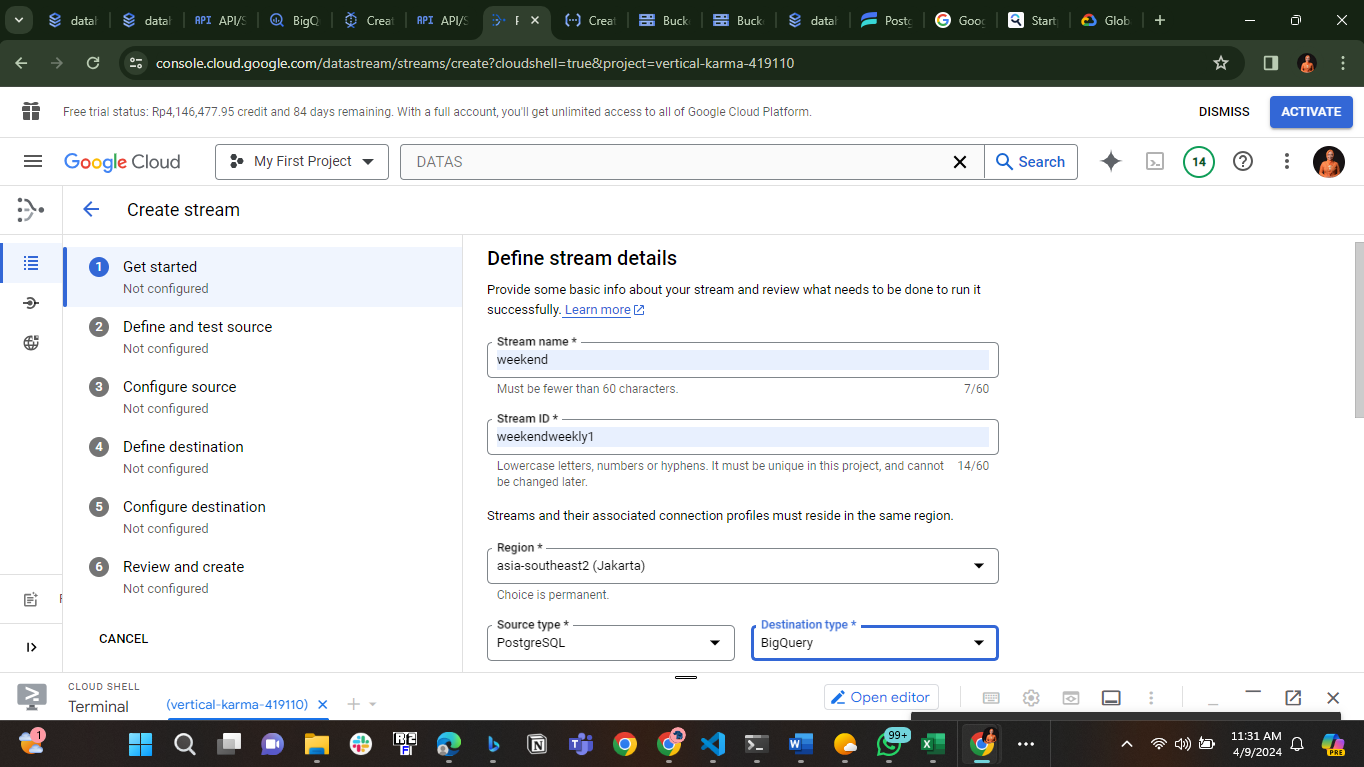

### Done step Data Stream 
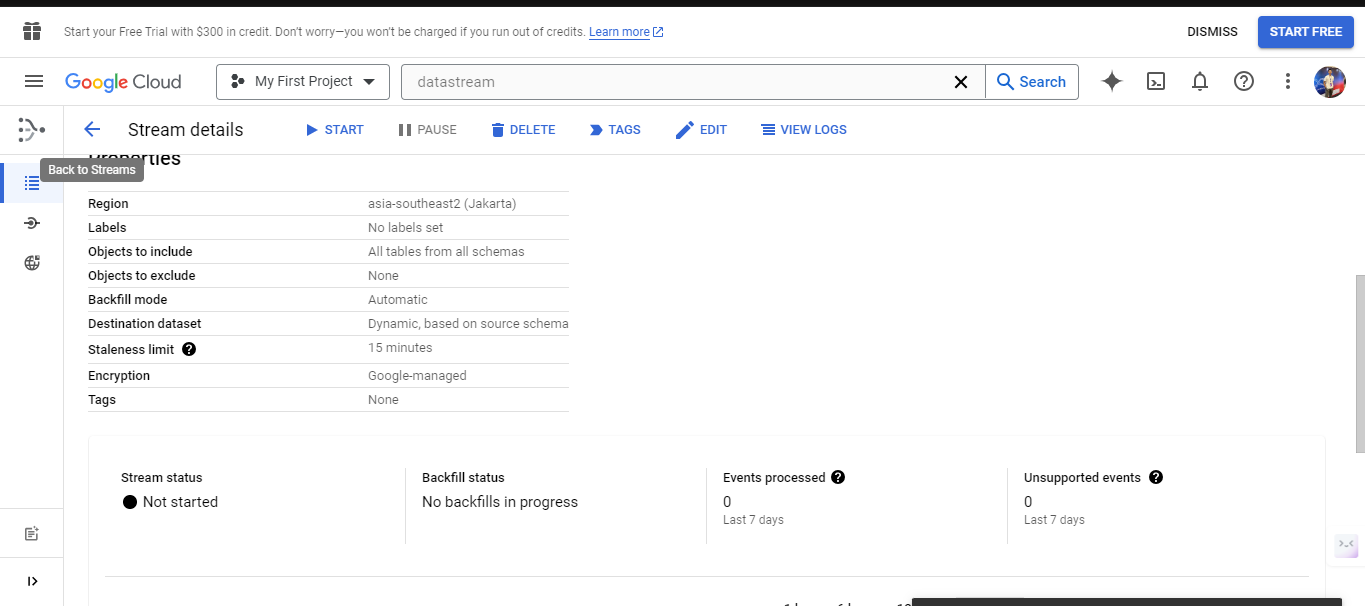

# Display Datastream connect to BigQuery ( Weekend)
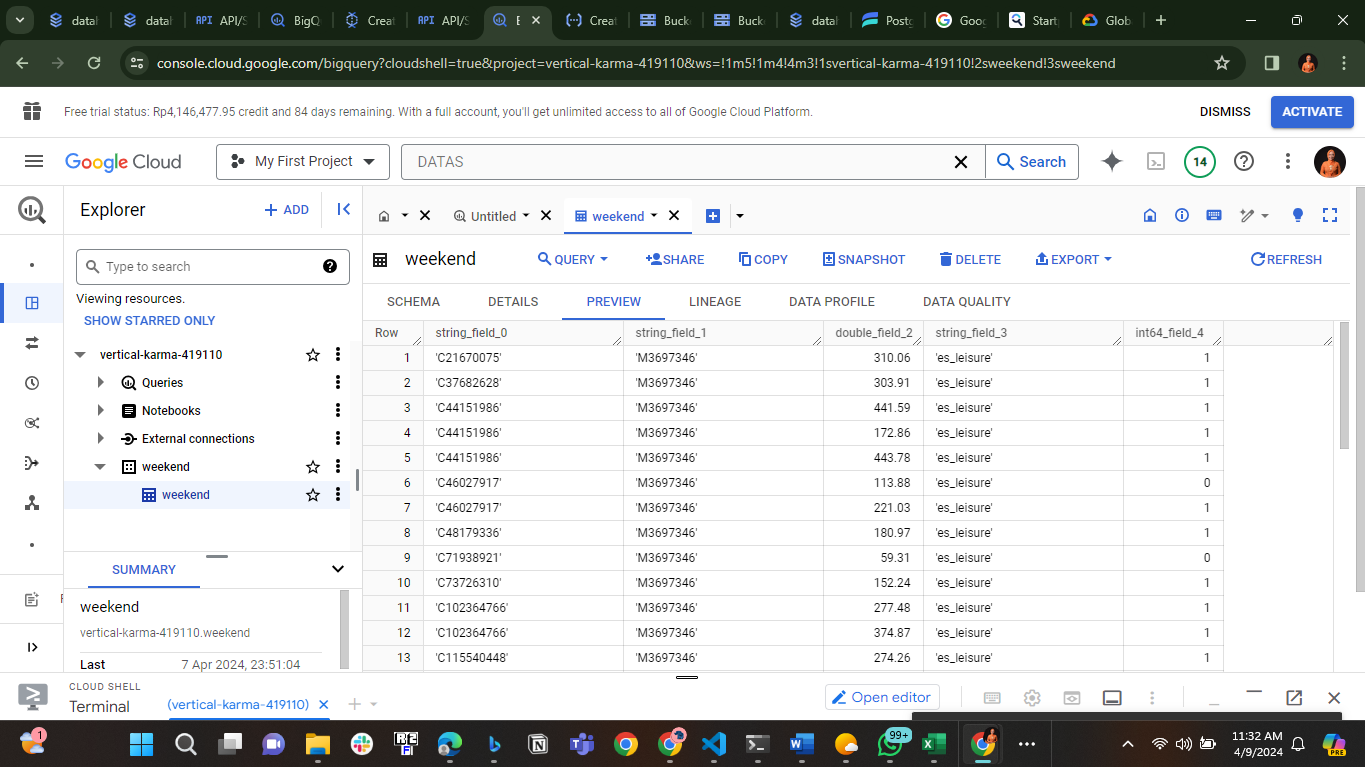

# Displat DataStream Connect to Bigquery (dataweekly5_cleaned)
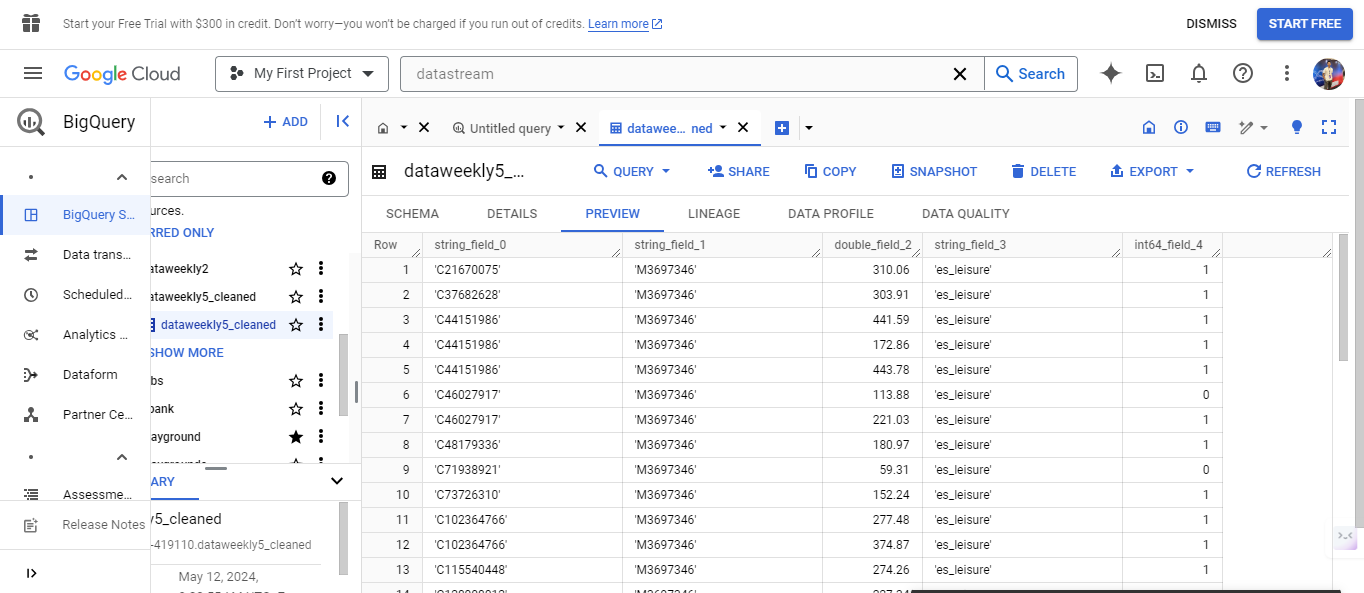

# Diagram Pipeline 

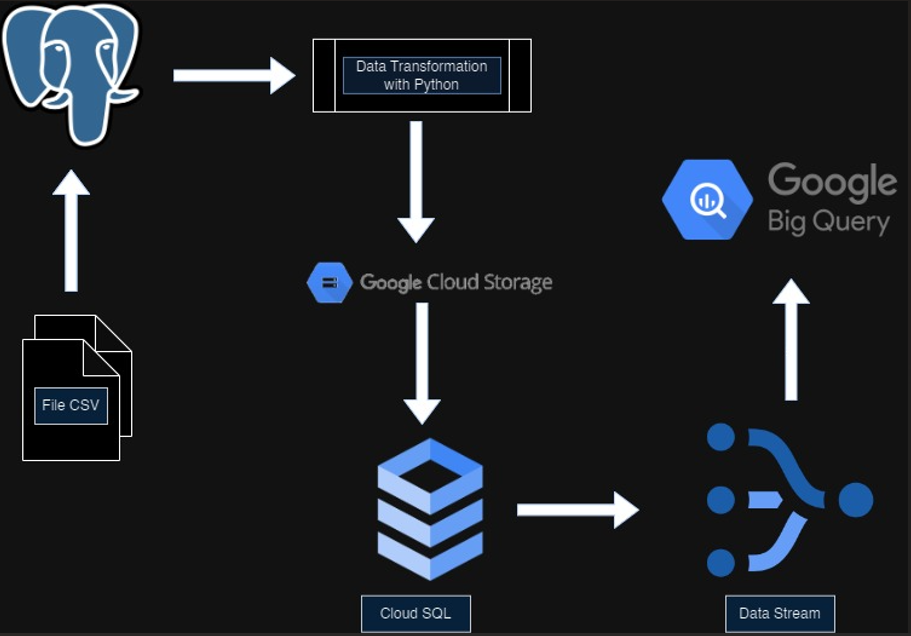

# Data Model ERD

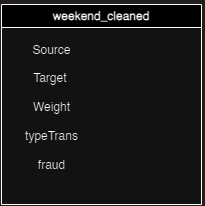